# Unit 5 - Financial Planning

In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
import numpy as np

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
my_btc = 1.2 
my_eth = 5.3

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [5]:
# Fetch current BTC price
response_data_btc = requests.get(btc_url)

# Fetch current ETH price
response_data_eth = requests.get(eth_url)

# Compute current value of my crpto
my_btc_value = response_data_btc.json()["data"]["1"]["quotes"]["CAD"]["price"]
my_eth_value = response_data_eth.json()["data"]["1027"]["quotes"]["CAD"]["price"]

# Print current crypto wallet balance

print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $44238.12
The current value of your 5.3 ETH is $2805.01


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [6]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [7]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2")

In [8]:
from datetime import date

In [9]:
# Format current date as ISO format
today = pd.Timestamp(date.today(), tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
df_portifolio = alpaca.get_barset(
    tickers,
    timeframe,
    limit=1000,
    start = today,
    end = today
).df
                     
# Preview DataFrame
df_portifolio.head()

AGG                                      SPY  \
                             open    high     low   close   volume    open   
time                                                                         
2021-06-11 00:00:00-04:00  115.31  115.32  115.16  115.24  3470062  424.19   

                                                             
                             high     low   close    volume  
time                                                         
2021-06-11 00:00:00-04:00  424.42  422.82  424.32  37014839

In [10]:
df_portifolio["AGG"]["close"]
df_portifolio["SPY"]["close"]     
print(df_portifolio["AGG"]["close"] , df_portifolio["SPY"]["close"])  

time
2021-06-11 00:00:00-04:00    115.24
Name: close, dtype: float64 time
2021-06-11 00:00:00-04:00    424.32
Name: close, dtype: float64


In [11]:
# Pick AGG and SPY close prices
agg_close_price = df_portifolio["AGG"]["close"][0]
spy_close_price = df_portifolio["SPY"]["close"][0]    

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $115.24
Current SPY closing price: $424.32


In [12]:
type(agg_close_price)

numpy.float64

In [13]:
# Compute the current value of shares
my_agg_value = my_agg * agg_close_price
my_spy_value = my_spy * spy_close_price

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $21216.00
The current value of your 200 AGG shares is $23048.00


### Savings Health Analysis

In [14]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data
crypto_value = my_btc_value + my_eth_value 
shares_value = my_agg_value + my_spy_value
# Create savings DataFrame
data =[crypto_value , shares_value]
df_savings = pd.DataFrame(data, columns = ['amount'], index=["crypto" , "shares"])
df_savings = df_savings.round(2)

In [15]:
# Display savings DataFrame
display(df_savings)

,amount
crypto,47043.13
shares,44264.00


<AxesSubplot:title={'center':'Portfolio Composition'}, ylabel='amount'>

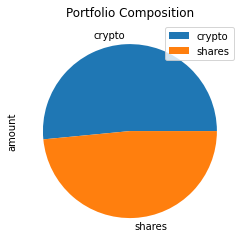

In [16]:
# Plot savings pie chart
df_savings.plot.pie(y="amount", title="Portfolio Composition")

In [17]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = crypto_value + shares_value
print(total_savings)

# Validate saving health
if emergency_fund < total_savings:
    print ("Congrats you have enough money!!!")
elif emergency_fund > total_savings:
    print ("Youre emergency fund is low " , emergency_fund - total_savings )
else:
    print("You Have Reached You Goal")

91307.13185
Congrats you have enough money!!!


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [18]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-05-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-05-01', tz='America/New_York').isoformat()

In [19]:
# Get 5 years' worth of historical data for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
# Format current date as ISO format

df_stock_data = alpaca.get_barset(
    tickers,
    timeframe,
    start = start_date,
    end = end_date,
    limit=1000
).df
                     
# Preview DataFrame
#df_stock_data = "start_date" and "end_date"

# Display sample data
df_stock_data.head()

AGG                                       \
                             open     high       low    close   volume   
time                                                                     
2017-05-11 00:00:00-04:00  108.35  108.540  108.3435  108.515  1773499   
2017-05-12 00:00:00-04:00  108.81  108.940  108.7800  108.920  1136553   
2017-05-15 00:00:00-04:00  108.85  108.940  108.8200  108.890  1620264   
2017-05-16 00:00:00-04:00  108.88  109.101  108.8800  109.000  1394153   
2017-05-17 00:00:00-04:00  109.35  109.600  109.2800  109.560  2263851   

                              SPY                                      
                             open    high     low    close     volume  
time                                                                   
2017-05-11 00:00:00-04:00  239.35  239.57  238.13  239.410   45435690  
2017-05-12 00:00:00-04:00  239.09  239.21  238.67  239.030   35283567  
2017-05-15 00:00:00-04:00  239.47  240.44  239.45  240.245   42230620  
2017-05-16 00:00:00-04:00  240.62  240.67  239.63  240.100   37206183  
2017-05-17 00:00:00-04:00  238.10  238.64  235.75  235.850  118613594

In [20]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
num_sims = 500

# Configure a Monte Carlo simulation to forecast three years daily returns
mc_stock_data = MCSimulation(
    portfolio_data = df_stock_data,
    num_simulation = num_sims,
    num_trading_days = 252*30,
    weights = [.40,.60]
)


In [21]:
# Printing the simulation input data
mc_stock_data.portfolio_data.dropna().head()

AGG                                       \
                             open      high       low   close   volume   
time                                                                     
2017-05-12 00:00:00-04:00  108.81  108.9400  108.7800  108.92  1136553   
2017-05-15 00:00:00-04:00  108.85  108.9400  108.8200  108.89  1620264   
2017-05-16 00:00:00-04:00  108.88  109.1010  108.8800  109.00  1394153   
2017-05-17 00:00:00-04:00  109.35  109.6000  109.2800  109.56  2263851   
2017-05-18 00:00:00-04:00  109.54  109.6299  109.4433  109.55  1873534   

                                           SPY                           \
                          daily_return    open    high     low    close   
time                                                                      
2017-05-12 00:00:00-04:00     0.003732  239.09  239.21  238.67  239.030   
2017-05-15 00:00:00-04:00    -0.000275  239.47  240.44  239.45  240.245   
2017-05-16 00:00:00-04:00     0.001010  240.62  240.67  239.63  240.100   
2017-05-17 00:00:00-04:00     0.005138  238.10  238.64  235.75  235.850   
2017-05-18 00:00:00-04:00    -0.000091  235.70  237.75  235.43  236.670   

                                                   
                              volume daily_return  
time                                               
2017-05-12 00:00:00-04:00   35283567    -0.001587  
2017-05-15 00:00:00-04:00   42230620     0.005083  
2017-05-16 00:00:00-04:00   37206183    -0.000604  
2017-05-17 00:00:00-04:00  118613594    -0.017701  
2017-05-18 00:00:00-04:00   82965499     0.003477

In [22]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
mc_stock_data.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.001533,1.001041,1.006257,0.999548,0.995926,1.007785,1.013592,0.991751,0.997844,1.005405,...,0.984089,1.005922,0.990551,1.002535,1.003490,1.004912,0.997465,0.996433,1.007640,1.001345
2,1.017628,0.995538,1.013234,0.999255,0.994443,1.011068,1.013940,0.998897,1.006336,0.994204,...,0.968615,0.995481,0.984041,1.007813,1.001622,1.011446,0.989688,0.990221,0.997628,1.006201
3,1.021138,0.995264,1.013823,1.003923,0.979752,1.005006,1.023014,0.999324,1.001140,1.010988,...,0.957147,1.000602,1.003221,1.017835,1.009937,1.000722,0.997724,0.991058,1.004766,1.010237
4,1.021739,0.994933,0.999534,1.004940,0.990865,1.015288,1.031154,0.983638,1.003111,1.000363,...,0.950986,0.994421,1.002017,1.022324,1.013355,1.005532,1.004068,1.015749,1.010773,1.015356
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,9.780692,16.693978,16.001937,32.175176,9.268643,10.131171,18.083777,26.740952,16.191437,17.769928,...,39.527813,9.093182,4.582172,23.105771,28.619782,11.055018,48.372939,16.198942,30.553254,8.827704
7557,9.687210,16.648616,16.047961,32.081513,9.500899,9.994667,18.230500,27.162418,16.136362,17.882809,...,39.399256,9.008920,4.656794,23.154761,28.959805,11.014705,49.093782,16.036749,30.593777,8.930226
7558,9.702248,16.459347,16.215406,32.153787,9.459886,10.037814,18.344932,27.412880,16.035143,17.929158,...,39.232217,8.997129,4.697360,22.871097,29.067392,11.204902,49.123136,15.994327,30.894818,9.021883
7559,9.724483,16.411282,16.374574,32.522276,9.350291,10.086395,18.171924,27.194815,16.294413,17.999219,...,39.987697,8.989531,4.693851,23.101257,28.831937,11.178394,49.073941,16.036373,31.233220,9.005147


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 7560 Trading Days.'}>

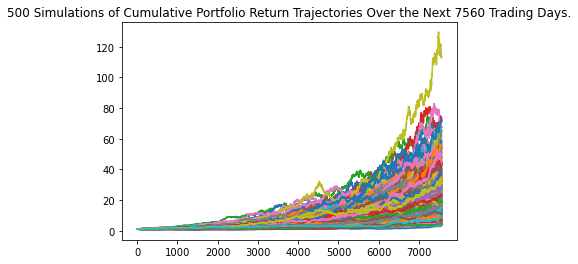

In [23]:
# Plot simulation outcomes
mc_stock_data.plot_simulation()

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

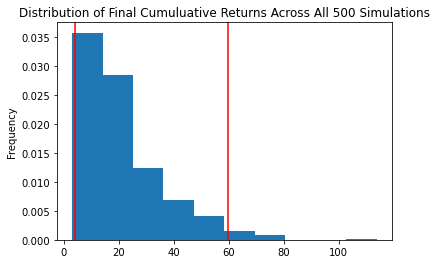

In [24]:
# Plot probability distribution and confidence intervals
mc_stock_data.plot_distribution()

### Retirement Analysis

In [25]:
# Fetch summary statistics from the Monte Carlo simulation results
summary_status = mc_stock_data.summarize_cumulative_return()
summary_status

# Print summary statistics

count           500.000000
mean             21.422379
std              15.013644
min               3.116294
25%              10.368104
50%              17.311624
75%              27.620649
max             113.743563
95% CI Lower      4.185652
95% CI Upper     59.868052
Name: 7560, dtype: float64

### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [26]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000

ci_lower = round(summary_status[8]*initial_investment,2)
ci_upper = round(summary_status[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $83713.04 and $1197361.04


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [27]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000

ci_lower = round(summary_status[8]*initial_investment,2)
ci_upper = round(summary_status[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $125569.57 and $1796041.56


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [35]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
num_sims = 500

# Configure a Monte Carlo simulation to forecast three years daily returns
mc_chalange_5 = MCSimulation(
    portfolio_data = df_stock_data,
    num_simulation = num_sims,
    num_trading_days = 252*5,
    weights = [.20,.80]
)

In [36]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
mc_chalange_5.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.977436,0.990642,1.002819,1.018016,0.995722,1.012885,0.995709,0.996051,0.995048,0.994377,...,1.009082,0.988241,0.998614,1.014160,0.985180,0.991336,1.004893,0.996442,1.009517,0.974337
2,0.983453,0.965981,1.019267,1.034841,0.992909,1.028680,0.995324,0.995267,1.005492,0.993818,...,1.010903,0.992286,1.000394,1.020126,0.977911,1.001886,1.010360,1.014976,1.009706,0.960867
3,0.993638,0.969788,1.026947,1.033396,0.993893,1.030410,1.003654,0.991411,1.021236,0.985487,...,1.004084,0.999929,1.008942,1.025014,0.966966,1.004299,1.000167,1.016000,1.013354,0.958006
4,1.003549,0.971971,1.019934,1.016842,0.998877,1.024241,1.010862,0.981725,1.009572,0.978757,...,1.017073,1.002357,1.002362,1.004100,0.957675,1.005097,1.026860,1.022381,1.018254,0.958898
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,2.141549,2.183076,3.596167,1.690942,2.452371,1.209908,1.715357,1.608825,1.364651,1.485158,...,2.107195,1.419511,1.447037,0.888949,1.645120,2.650190,1.526325,2.668895,1.107557,1.085868
1257,2.117117,2.173784,3.624523,1.688983,2.444810,1.194642,1.701531,1.633786,1.344891,1.481711,...,2.076876,1.401044,1.433892,0.890083,1.654989,2.675480,1.542524,2.657740,1.112883,1.085972
1258,2.111930,2.211467,3.624072,1.684260,2.403269,1.183251,1.688335,1.621656,1.370783,1.477992,...,2.136112,1.418513,1.448298,0.890642,1.658726,2.685883,1.544580,2.665863,1.090255,1.088205
1259,2.151583,2.204413,3.622295,1.659298,2.436440,1.164789,1.686287,1.591535,1.350813,1.452803,...,2.090329,1.428339,1.480772,0.891247,1.654139,2.687233,1.559287,2.666393,1.073491,1.085302


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 1260 Trading Days.'}>

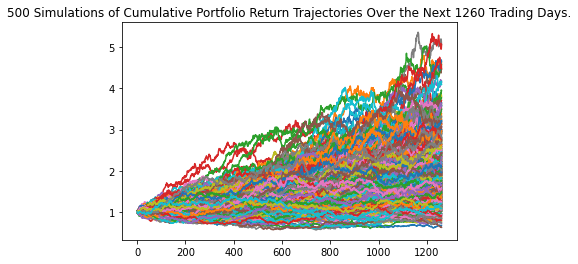

In [37]:
# Plot simulation outcomes
mc_chalange_5.plot_simulation()

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

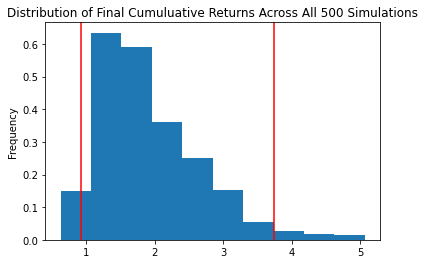

In [38]:
# Plot probability distribution and confidence intervals
mc_chalange_5.plot_distribution()

In [43]:
# Fetch summary statistics from the Monte Carlo simulation results
mc_chalange_5.summarize_cumulative_return()
mc_chalange_summay = mc_chalange_5.summarize_cumulative_return()
mc_chalange_summay
# Print summary statistics


count           500.000000
mean              1.919885
std               0.754321
min               0.623763
25%               1.367923
50%               1.750825
75%               2.331737
max               5.068963
95% CI Lower      0.915614
95% CI Upper      3.741304
Name: 1260, dtype: float64

In [44]:
# Set initial investment
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(mc_chalange_summay[8]*initial_investment,2)
ci_upper_five = round(mc_chalange_summay[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $54936.82 and $224478.22


### Ten Years Retirement Option

In [46]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
num_sims = 500

mc_chalange_10 = MCSimulation(
    portfolio_data = df_stock_data,
    num_simulation = num_sims,
    num_trading_days = 252*10,
    weights = [.70,.30]
)

In [47]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
mc_chalange_10.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.004166,1.002560,0.989718,1.004945,0.995333,0.999099,0.992713,0.993149,0.999788,0.995773,...,0.996082,0.993830,0.997367,1.005830,1.002840,0.998081,1.006193,0.994103,1.003392,0.998685
2,1.003837,0.997395,0.983364,1.001429,0.996075,0.998215,0.988521,1.003523,1.002432,0.991335,...,0.996451,0.991776,1.002917,1.014784,1.000604,0.992960,1.006924,0.996317,1.008224,1.004083
3,1.007823,0.987157,0.986136,1.004045,0.995799,0.994208,0.992231,1.003341,1.011632,0.991637,...,1.001554,0.993138,1.004242,1.015197,1.002759,0.994685,1.006015,0.999296,1.006040,1.000047
4,0.997844,0.989820,0.984488,1.007363,0.990970,0.990090,0.985833,1.004951,1.009273,0.988568,...,1.010578,0.995731,1.000249,1.017444,1.006943,0.988443,1.006892,0.992331,1.008543,1.003371
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,2.107272,2.263170,1.873026,1.520623,1.772227,1.584170,1.828445,2.062933,1.842557,1.809046,...,1.094539,2.019703,1.873944,1.773258,1.470556,2.508817,2.204813,1.933942,1.975503,2.274017
2517,2.108748,2.261585,1.871121,1.518148,1.765920,1.575609,1.837812,2.070379,1.836753,1.805600,...,1.083304,2.017245,1.878436,1.768393,1.477051,2.496768,2.228790,1.947670,1.986017,2.255701
2518,2.090404,2.259918,1.862151,1.519617,1.770143,1.559504,1.836184,2.083080,1.861473,1.806615,...,1.082086,2.009808,1.874883,1.781707,1.467710,2.507180,2.217705,1.946127,2.001548,2.249252
2519,2.101091,2.259152,1.864021,1.509280,1.783738,1.560346,1.848607,2.078434,1.863359,1.812274,...,1.084686,2.002756,1.879326,1.778179,1.471994,2.503632,2.229046,1.940028,1.999811,2.246203


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 2520 Trading Days.'}>

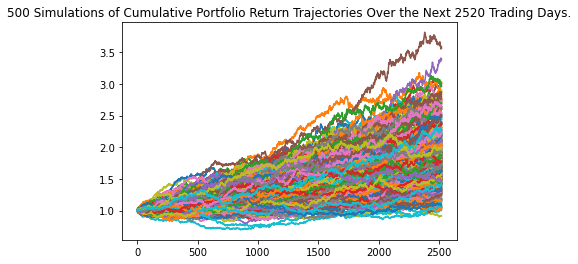

In [48]:
# Plot simulation outcomes
mc_chalange_10.plot_simulation()

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

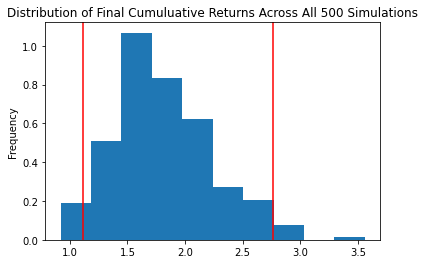

In [49]:
# Plot probability distribution and confidence intervals
mc_chalange_10.plot_distribution()

In [53]:
# Fetch summary statistics from the Monte Carlo simulation results
mc_chalange_10_summary = mc_chalange_10.summarize_cumulative_return()
# Print summary statistics
mc_chalange_10_summary

count           500.000000
mean              1.819160
std               0.430861
min               0.918724
25%               1.514288
50%               1.757294
75%               2.100988
max               3.561569
95% CI Lower      1.114715
95% CI Upper      2.759929
Name: 2520, dtype: float64

In [56]:
# Set initial investment
initial_investment = 60000
ci_lower_ten = round(mc_chalange_10_summary[8]*initial_investment,2)
ci_upper_ten = round(mc_chalange_10_summary[9]*initial_investment,2)

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000


# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $66882.87 and $165595.72
